# Vision Tarea 19
#### Daniel Castro Pineda 2220220H

### Dada la señal x(t) = cos(40 pi t) hacer:

In [17]:
import numpy as np
import matplotlib.pyplot as plt

## a) Determinar la frecuencia y periodo de muestreo máximo que cumple el teorema de Nyquist,

$$ x(t) = cos(40 \pi t) $$

$$ T_o = \frac{2 \pi}{40 \pi} = \frac{1}{20} $$

$$ 2T_m \leq T_o $$

$$ T_m \leq \frac{1}{2} T_o = \frac{1}{2} * \frac{1}{20} = \frac{1}{40}$$

$$ T_m = \frac{1}{40} $$

$$ w_m = \frac{2 \pi }{T_m} $$
$$ w_m = \frac{2 \pi }{\frac{1}{40}} = 80 \pi $$

## b) Para un periodo de muestreo Tm = 1/40 y calcule una señal muestreada xm[n] para N=128 muestras. 

Text(0.5, 0, 'Muestras [n]')

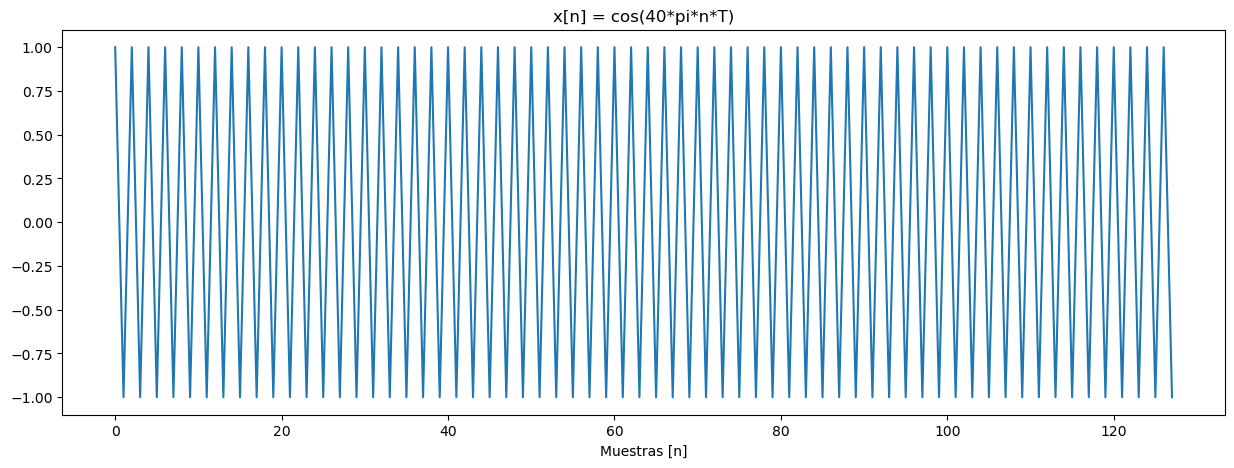

In [29]:
N = 128
n = np.arange(N)
T = 1/40

x = np.cos(40*np.pi*n*T)
plt.figure(figsize=(15, 5))
plt.title('x[n] = cos(40*pi*n*T)')
plt.plot(n, x)
plt.xlabel('Muestras [n]')

## c) Dada la formula de integración de la señal continua calcular los valores para t entre 0.05 y 0.1 con un incremento de 0.001. Comparar con los resultados exactos para la señal original.

In [19]:
def sinc(x):
    if x == 0:
        return 1
    else:
        return np.sin(x)/x


def interpola(x, t, T):
    N = len(x)
    val = 0
    for i in range(-30*N, 30*N):
        n = (i % N)
        if n < 0:
            n = N + n
        val += x[n] * sinc((t - i * T) * np.pi / T)
    return val


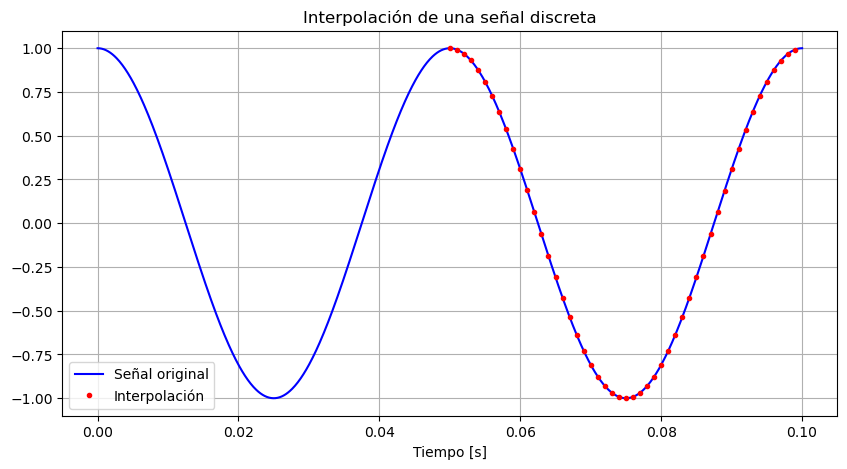

In [20]:
paso = np.arange(0.05, 0.1, 0.001)
tArray = np.array([interpola(x, t, T) for t in paso])

t = np.linspace(0, 4/40, 1000)
x = np.cos(40*np.pi*t)


plt.figure(figsize=(10, 5))
plt.title('Interpolación de una señal discreta')
plt.plot(t, x, 'b-' , label='Señal original')  # Grafica la señal original
plt.plot(paso, tArray, 'r.', label='Interpolación')
plt.legend() 
plt.xlabel('Tiempo [s]')
plt.grid()
plt.show()


# d) Repetir los incisos para un Tm = 1/10 que no cumple con el teorema de Nyquist. Concluir.


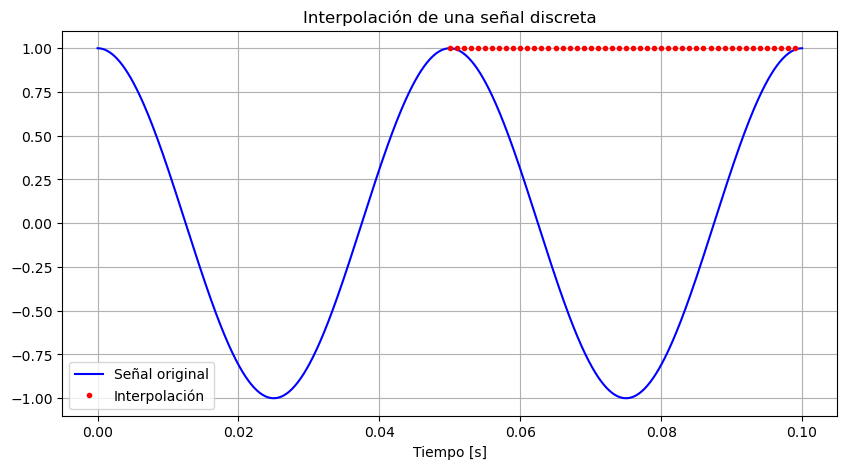

In [21]:
N = 128
n = np.arange(N)
T = 1/10

x = np.cos(40*np.pi*n*T)

paso = np.arange(0.05, 0.1, 0.001)
tArray = np.array([interpola(x, t, T) for t in paso])

a = np.linspace(0, 4/40, 1000)
b = np.cos(40*np.pi*t)

plt.figure(figsize=(10, 5))
plt.title('Interpolación de una señal discreta')
plt.plot(a, b, 'b-', label='Señal original')  # Grafica la señal original
plt.plot(paso, tArray, 'r.', label='Interpolación')
plt.legend()
plt.xlabel('Tiempo [s]')
plt.grid()
plt.show()


Podemos ver que seleccionar un muestreo que no cumpla con el teorema de Nyquist, nos da una señal que no se parece a la original. Esto lo podemos ver con mejor detalle en la siguiente gráfica interactiva utilizando los widgets de ipython.

In [42]:
import ipywidgets as widgets
from ipywidgets import interact

def dibujar(T = 1/40):
    N = 128
    n = np.arange(N)
    x = np.cos(40*np.pi*n*T)

    paso = np.arange(0.05, 0.1, 0.001)
    tArray = np.array([interpola(x, t, T) for t in paso])

    a = np.linspace(0, 4/40, 1000)
    b = np.cos(40*np.pi*t)
    plt.figure(figsize=(15, 5))
    plt.ylim(-1.2, 1.2)
    plt.title('Interpolación de una señal discreta con T = ' + str(T))
    plt.plot(a, b, 'b-', label='Señal original')  # Grafica la señal original
    plt.plot(paso, tArray, 'r.', label='Interpolación')
    plt.legend()
    plt.xlabel('Tiempo [s]')
    plt.grid()
    # plt.show()


In [43]:
interact(dibujar, T=(1/200, 1/10, 1/200))

interactive(children=(FloatSlider(value=0.025, description='T', max=0.1, min=0.005, step=0.005), Output()), _d…

<function __main__.dibujar(T=0.025)>